In [91]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
plt.rcParams['figure.figsize'] = [15,5]

C:\Users\ricca\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\scipy\signal\_spectral_py.py:2017: UserWarning: nperseg = 2048 is greater than input length  = 2000, using nperseg = 2000
  warnings.warn('nperseg = {0:d} is greater than input length '


Text(0, 0.5, 'Signal [V]')

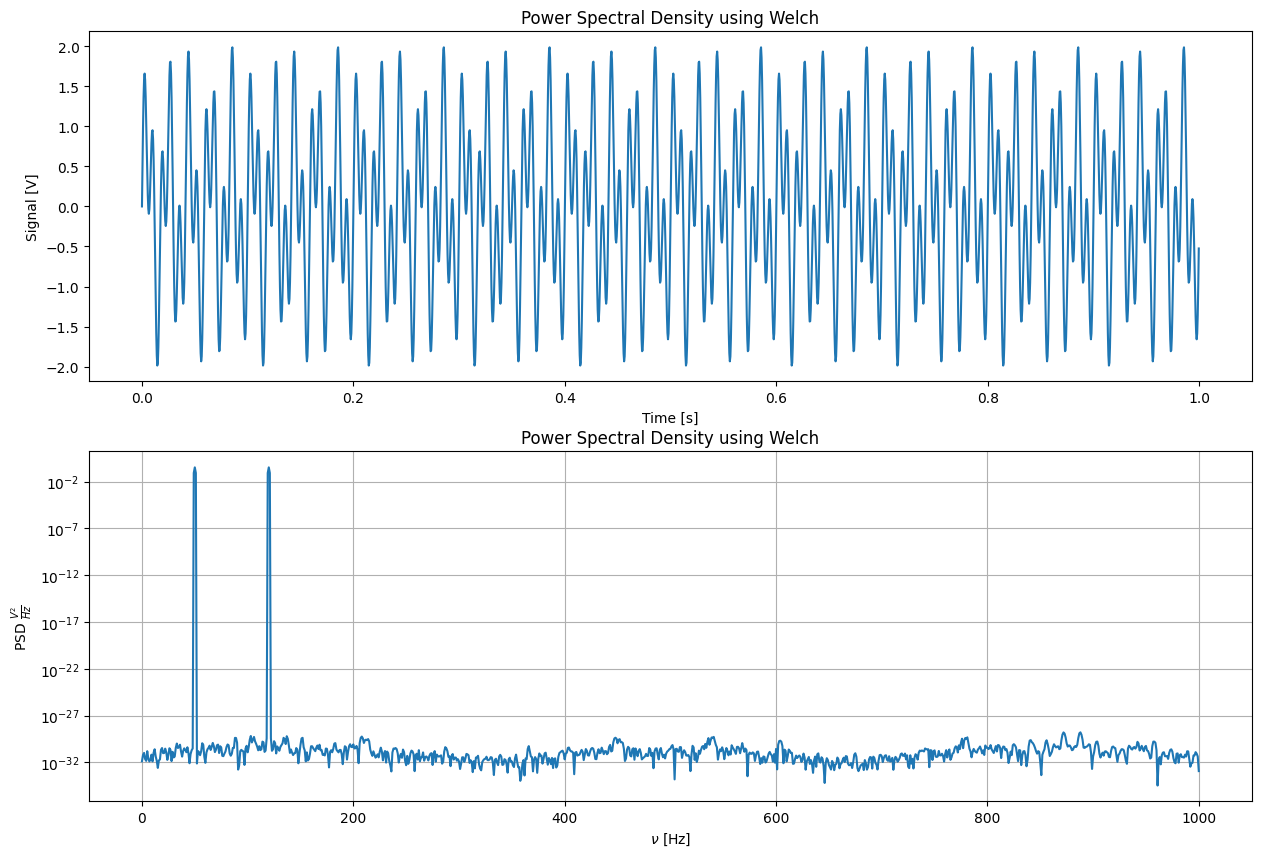

In [94]:
# Example: Create a sample signal
fs = 2000  # Sampling frequency (Hz)
t = np.linspace(0, 1, fs, endpoint=False)  # Time vector
# Create a signal with two frequencies: 50 Hz and 120 Hz
sig = np.sin(2 * np.pi * 50 * t) + np.sin(2 * np.pi * 120 * t)

# Compute the PSD using Welch's method
frequencies, psd = signal.welch(sig, fs, nperseg=256*8)

# Plot the PSD
fig, axs = plt.subplots(2,1, figsize=(15,10))
plt.sca(axs[1])
plt.semilogy(frequencies, psd)
plt.title('Power Spectral Density using Welch')
plt.xlabel(r'$\nu$ [Hz]')
plt.ylabel(r'PSD $\frac{V^{2}}{Hz}$')
plt.grid()

plt.sca(axs[0])
plt.plot(t,sig)
plt.title('Power Spectral Density using Welch')
plt.xlabel('Time [s]')
plt.ylabel('Signal [V]')

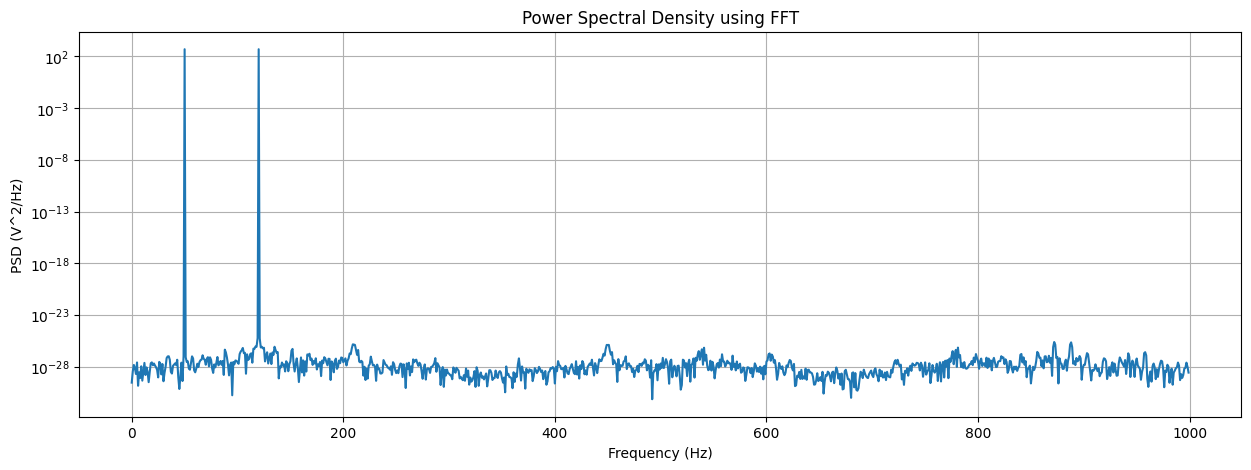

In [93]:
# Compute the FFT of the signal
fft_vals = np.fft.fft(sig)
fft_freqs = np.fft.fftfreq(len(sig), 1/fs)

# Compute the PSD
psd = np.abs(fft_vals) ** 2 / len(sig)

# Since the signal is real, we only need to keep the positive frequencies
positive_freqs = fft_freqs[:len(sig)//2]
positive_psd = psd[:len(sig)//2]

# Plot the PSD
plt.figure()
plt.semilogy(positive_freqs, positive_psd)
plt.title('Power Spectral Density using FFT')
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD (V^2/Hz)')
plt.grid()
plt.show()
